using Library such pandas for DataFram load or to read
using 

In [61]:
import pandas as pd
titanic = pd.read_csv("train (1).csv")


# summary first five records

In [62]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# summary information a bout titanic dataframe

In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### this line return a series of labeled data and the missing value in each label

In [64]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Countplot 
# Survived vs Sex(Binary feature)
## Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

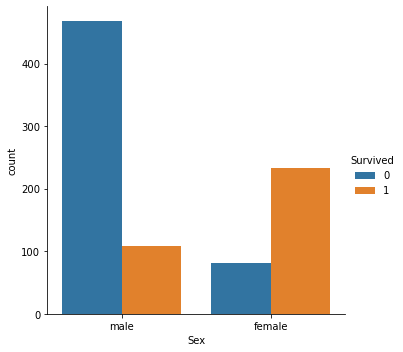

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)

# Pclass (Ordinal Feature) vs Survived

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

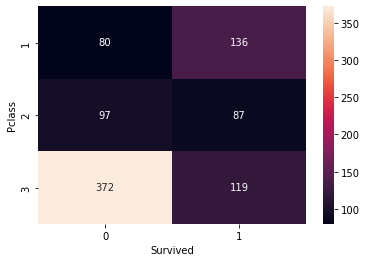

In [66]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
# fmt = format which is in this case decimal.
sns.heatmap(pclass_survived, annot = True ,fmt ="d")

# Age (Continuous Feature) vs Survived
### Violin plot Displays distribution of data across all levels of a category.

In [67]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Age'>

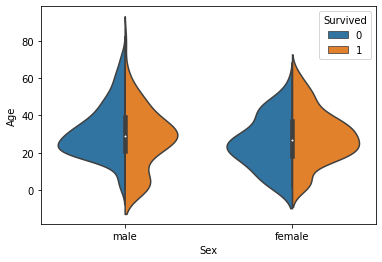

In [68]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)

#### This graph gives(ABOVE) a summary of the age range of men, women and children who were saved. The survival rate is –  
### Good for children.
### High for women in the age range 20-50.
### Less for men as the age increases

### Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

### Important observations – 

### If a passenger is alone, the survival rate is less.
### If the family size is greater than 5, chances of survival decrease considerably.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


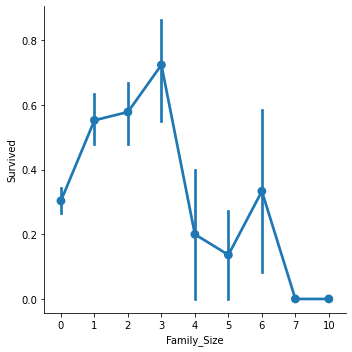

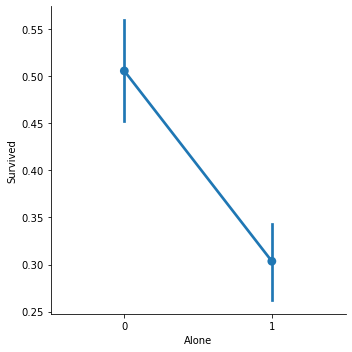

In [69]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']
 
# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)

# Bar Plot for Fare (Continuous Feature)  

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

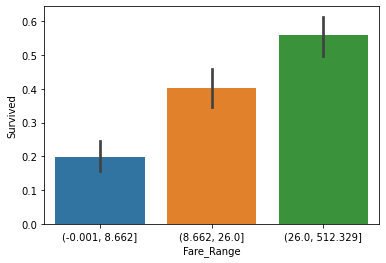

In [70]:
# Divide Fare into 3 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 3)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic)

<AxesSubplot:xlabel='Age_Range', ylabel='Survived'>

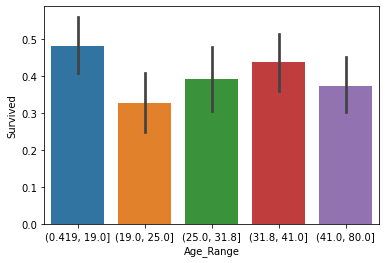

In [71]:
titanic['Age_Range'] = pd.qcut(titanic['Age'], 5)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Age_Range', y ='Survived',
data = titanic)

### Categorical Count Plots for Embarked Feature

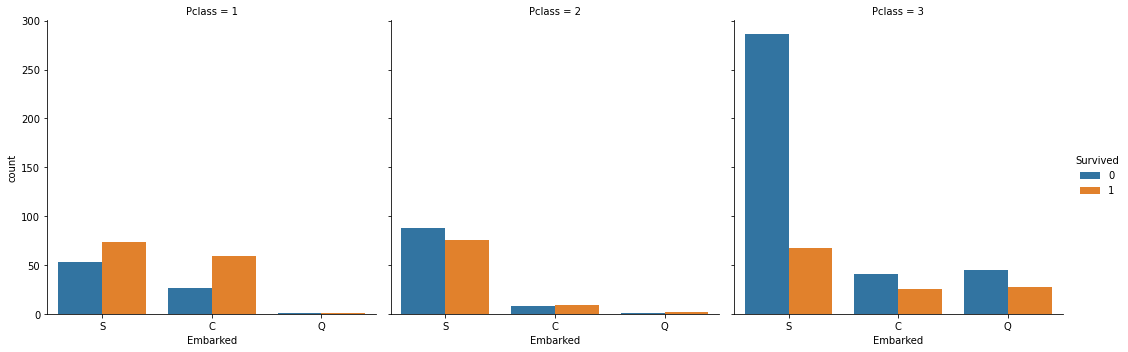

In [72]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic)

In [73]:
corrl = titanic.corr()

<AxesSubplot:>

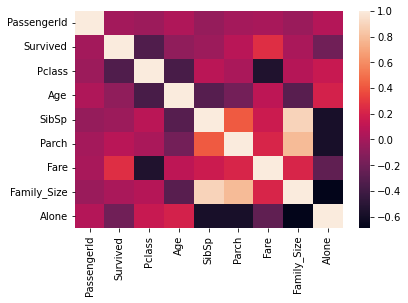

In [74]:
sns.heatmap(corrl)

### Pclass - Survived
###  Sex- Survived
### SibSp - Survived
### Parch - Survived

In [75]:
# Plcass vs Survived
titanic[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [76]:
# Sex vs Survived
titanic[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(
    by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [77]:
# Sibsp vs Survived
titanic[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [78]:
# Parch vs Survived
titanic[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
